In [ ]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.3 MB/s eta 0:00:00


In [ ]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import numpy as np
import seaborn as sb

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from dmba import classificationSummary, gainsChart, liftChart
%matplotlib inline

Colab environment detected.


In [ ]:
path = '/content/drive/MyDrive/datasets/epl2020.exc.xlsx'

In [ ]:
epl = pd.read_excel(path)

In [ ]:
clean= epl.drop(['deep', 'deep_allowed', 'scored', 'missed', 'pts', 'matchtime', 'ppda_cal', 'allowed_ppda', 'round', 'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x', 'AF.x', 'AC.x', 'AY.x', 'AR.x', 'wins', 'loses','result','date','B365H.x','B365A.x','Referee.x', 'matchDay', 'teamId'], axis=1)

In [ ]:
sliced= (clean[50:])

In [ ]:
X = sliced.drop(columns=['draws'])
Y = sliced['draws']

In [ ]:
sliced['h_a'] = sliced['h_a'].astype('category')
new_categories = {0: 'h', 1: 'a'}
sliced.h_a.cat.rename_categories(new_categories, inplace=True)

<ipython-input-72-d692806970cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced['h_a'] = sliced['h_a'].astype('category')
<ipython-input-72-d692806970cb>:3: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  sliced.h_a.cat.rename_categories(new_categories, inplace=True)


In [ ]:
sliced = pd.get_dummies(sliced, prefix_sep='_', drop_first=True)
y = sliced['h_a']
X = sliced.drop(columns=['h_a'])

KeyError: ignored

In [ ]:
print(sliced)

     Unnamed: 0 h_a        xG       xGA      npxG     npxGA    xpts  draws  \
50           51   h  2.293480  3.457680  2.293480  2.696510  0.6389      0   
51           52   a  3.457680  2.293480  2.696510  2.293480  2.1833      0   
52           53   a  0.985542  2.788210  0.985542  2.027040  0.3434      0   
53           54   h  2.788210  0.985542  2.027040  0.985542  2.5205      0   
54           55   h  1.893450  3.128560  1.893450  3.128560  0.6611      0   
..          ...  ..       ...       ...       ...       ...     ...    ...   
571         572   a  0.445922  2.028830  0.445922  2.028830  0.2901      0   
572         573   a  0.585469  1.738900  0.585469  1.738900  0.3539      0   
573         574   h  1.738900  0.585469  1.738900  0.585469  2.4269      0   
574         575   a  0.672448  2.412390  0.672448  1.651220  0.2673      0   
575         576   h  2.412390  0.672448  1.651220  0.672448  2.5950      0   

        npxGD  tot_points  tot_goal  tot_con  B365D.x  HtrgPerc

In [ ]:
print(X)

     Unnamed: 0        xG       xGA      npxG     npxGA    xpts     npxGD  \
50           51  2.293480  3.457680  2.293480  2.696510  0.6389 -0.403030   
51           52  3.457680  2.293480  2.696510  2.293480  2.1833  0.403030   
52           53  0.985542  2.788210  0.985542  2.027040  0.3434 -1.041498   
53           54  2.788210  0.985542  2.027040  0.985542  2.5205  1.041498   
54           55  1.893450  3.128560  1.893450  3.128560  0.6611 -1.235110   
..          ...       ...       ...       ...       ...     ...       ...   
571         572  0.445922  2.028830  0.445922  2.028830  0.2901 -1.582908   
572         573  0.585469  1.738900  0.585469  1.738900  0.3539 -1.153431   
573         574  1.738900  0.585469  1.738900  0.585469  2.4269  1.153431   
574         575  0.672448  2.412390  0.672448  1.651220  0.2673 -0.978772   
575         576  2.412390  0.672448  1.651220  0.672448  2.5950  0.978772   

     tot_points  tot_goal  tot_con  B365D.x  HtrgPerc  AtrgPerc  h_a_h  
50

In [ ]:
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.4, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_Y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print('AIC', AIC_score(valid_Y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.1597165144948907
       Unnamed: 0        xG       xGA      npxG     npxGA      xpts     npxGD  \
coeff    0.014926 -0.658417 -0.460131  0.179257  0.081783 -0.028404  0.097474   

       tot_points  tot_goal   tot_con   B365D.x  HtrgPerc  AtrgPerc     h_a_h  
coeff       -0.13  0.042185 -0.132562 -0.083065 -0.913355 -0.243705 -0.166119  
AIC 335.262419469603


In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_Y,'p(0)': [p[0] for p in logit_reg_proba],'p(1)': [p[1] for p in logit_reg_proba],'predicted': logit_reg_pred })

# display four different cases
interestingCases = [300,400]
print(logit_result.loc[interestingCases])

     actual      p(0)      p(1)  predicted
300       0  0.911544  0.088456          0
400       0  0.870856  0.129144          0


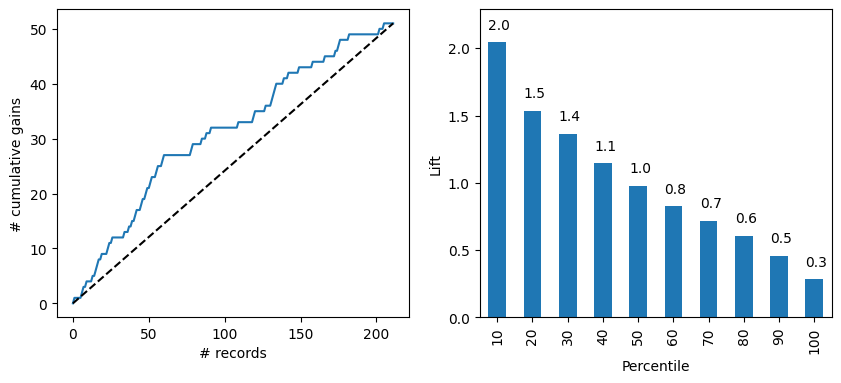

In [ ]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_Y, logit_reg_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.86       160
           1       0.43      0.06      0.10        51

    accuracy                           0.75       211
   macro avg       0.60      0.52      0.48       211
weighted avg       0.68      0.75      0.67       211



In [ ]:
print("\nValidation Set: Confusion matrix\n")
classificationSummary(valid_Y, logit_reg_pred)


Validation Set: Confusion matrix

Confusion Matrix (Accuracy 0.7536)

       Prediction
Actual   0   1
     0 156   4
     1  48   3


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Assuming you have your logistic regression model trained and stored in `model`
# X_test is your test data and y_test is the corresponding true labels

# Get predicted probabilities for each class
probabilities = logit_reg.predict_proba(X_test)

# Calculate the RPS
rps = log_loss(Y_test, probabilities, sample_weight=None, normalize=True)

print(f"Ranked Probability Score (RPS): {rps}")

Ranked Probability Score (RPS): 0.5296032450015161


With Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=1)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
print(X_train)

[[-0.47552545 -0.09632721  0.02512149 ...  0.43341516 -1.11061906
   1.07505242]
 [-0.76142217  0.40148506  0.09537138 ...  0.32434763  0.28933879
  -0.9301872 ]
 [ 0.19599941 -1.03961251  1.21676653 ...  0.08638212  1.88929063
   1.07505242]
 ...
 [-1.24678172 -0.56141451  0.24876815 ... -1.06626332 -0.31064314
   1.07505242]
 [-0.16303369  0.62251718 -0.7120626  ...  0.06258557 -0.11064917
   1.07505242]
 [-1.47948836 -0.35436506 -1.18957051 ...  0.97875279 -0.11064917
   1.07505242]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[118   3]
 [ 36   1]]


0.7531645569620253

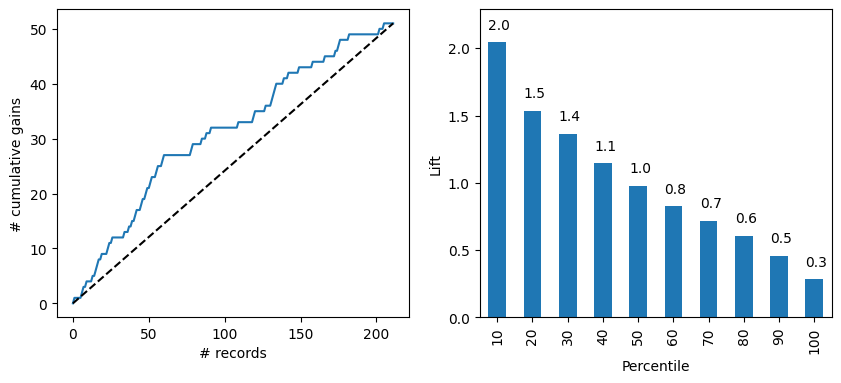

In [ ]:
df = classifier.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [ ]:
classifier = pd.DataFrame({'actual': valid_Y,'p(0)': [p[0] for p in logit_reg_proba],'p(1)': [p[1] for p in logit_reg_proba],'predicted': logit_reg_pred })

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       121
           1       0.25      0.03      0.05        37

    accuracy                           0.75       158
   macro avg       0.51      0.50      0.45       158
weighted avg       0.65      0.75      0.67       158



In [ ]:
def RPS(predictions, observed):
   ncat = 3
   npred = len(classifier)
   RPS = np.zeros(npred)

   for x in range(0, npred):
      obsvec = np.zeros(ncat)
      obsvec[observed.iloc[x]-1] = 1
      cumulative = 0
      for i in range(1, ncat):
          cumulative = cumulative + (sum(predictions.iloc[x, 1:i]) - sum(obsvec[1:i])) ** 2
          RPS[x] = (1/(ncat-1)) * cumulative

In [ ]:
print(RPS)

<function RPS at 0x7fa6d98bcd30>


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Assuming you have your logistic regression model trained and stored in `model`
# X_test is your test data and y_test is the corresponding true labels

# Get predicted probabilities for each class
probabilities = classifier.predict_proba(X_test)

# Calculate the RPS
rps = log_loss(Y_test, probabilities, sample_weight=None, normalize=True)

print(f"Ranked Probability Score (RPS): {rps}")

Ranked Probability Score (RPS): 27.331680295065134


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
